In [1]:
import pandas as pd

import os
import glob

In [2]:
def load_dfs(filename: str):
    all_csv = glob.glob(f'{os.getcwd()}/data/*/{filename}.csv')
    return pd.concat((pd.read_csv(filename, index_col='temp_id') for filename in all_csv), axis=0)

In [3]:
# Drop duplicate indices
def clean_indices(df):
    no_dups_df = df.loc[~df.index.duplicated(keep='first')]
    return no_dups_df

In [4]:
# Merge poeple and address
# Get address to people relations
def load_mapping(filename: str):
    all_csv = glob.glob(f'{os.getcwd()}/data/*/{filename}.csv')
    return pd.concat((pd.read_csv(filename) for filename in all_csv), axis=0)
mappings = load_mapping('ADDRESSES_PEOPLE')


In [5]:
df = load_dfs('PEOPLE')

In [6]:
df = clean_indices(df)

In [7]:
df = mappings.merge(df, left_on='person_uuid', right_index=True)

In [8]:
# Join addresses
address_df = load_dfs('ADDRESSES')

In [9]:
address_df = clean_indices(address_df)
address_df.index = address_df.index.rename('id')

In [10]:
# duplicated column
address_df = address_df.drop(columns=['countries_scope'])
address_df= address_df.rename(columns={'url': 'address_url'})

In [11]:
df = df.merge(address_df, left_on='address_uuid', right_index=True)
df = df.set_index('person_uuid', drop=True)
df = clean_indices(df)
df = df.drop(columns=['address_uuid'])

In [12]:
# Remove duplicated indices because on next merge kernel is going to die a lot
df = clean_indices(df)

In [13]:
publications_df = load_dfs('PUBLICATIONS')
publications_df = clean_indices(publications_df)
publications_df = publications_df.rename(columns={'url': 'publication_url'})

In [14]:
people_publications_mapping = load_mapping('PEOPLE_PUBLICATIONS')

In [15]:
df = df.merge(people_publications_mapping, left_index=True, right_on='person_uuid')

In [16]:
df = df.merge(publications_df, left_on='publication_uuid', right_index=True).set_index('person_uuid')

In [17]:
df = clean_indices(df)
df

,lastname,firstname,countries_scope,email,town,role,url,address,lat,lon,name,phone,address_url,publication_uuid,title,pubmed_id,journal,year,publication_url,abstract
person_uuid,,,,,,,,,,,,,,,,,,,,
1,von Düring,Marit Elizabeth,NO,NaN,oslo,NaN,NaN,"rikshospitaletoslo, norway",NaN,NaN,"section of nephrology, department of transplan...",NaN,NaN,1,Arterial stiffness is associated with visceral...,29957825,Clinical transplantation. Volume: 32 Issue: 8 ...,2018.0,http://www.ncbi.nlm.nih.gov/pubmed/29957825/,"Arterial stiffness, visceral fat, and hypergly..."
2,Jenssen,Trond,NO,NaN,oslo,NaN,NaN,"university of oslooslo, norway",NaN,NaN,"faculty of medicine, institute of clinical med...",NaN,NaN,1,Arterial stiffness is associated with visceral...,29957825,Clinical transplantation. Volume: 32 Issue: 8 ...,2018.0,http://www.ncbi.nlm.nih.gov/pubmed/29957825/,"Arterial stiffness, visceral fat, and hypergly..."
3,Bollerslev,Jens,NO,NaN,oslo,NaN,NaN,"uit the arctic university of norwaytromsø, norway",NaN,NaN,metabolic and renal research group,NaN,NaN,1,Arterial stiffness is associated with visceral...,29957825,Clinical transplantation. Volume: 32 Issue: 8 ...,2018.0,http://www.ncbi.nlm.nih.gov/pubmed/29957825/,"Arterial stiffness, visceral fat, and hypergly..."
4,Godang,Kristin,NO,NaN,oslo,NaN,NaN,"rikshospitaletoslo, norway",NaN,NaN,"section of specialized endocrinology, departme...",NaN,NaN,1,Arterial stiffness is associated with visceral...,29957825,Clinical transplantation. Volume: 32 Issue: 8 ...,2018.0,http://www.ncbi.nlm.nih.gov/pubmed/29957825/,"Arterial stiffness, visceral fat, and hypergly..."
5,Hartmann,Anders,NO,NaN,oslo,NaN,NaN,"rikshospitaletoslo, norway",NaN,NaN,"section of nephrology, department of transplan...",NaN,NaN,1,Arterial stiffness is associated with visceral...,29957825,Clinical transplantation. Volume: 32 Issue: 8 ...,2018.0,http://www.ncbi.nlm.nih.gov/pubmed/29957825/,"Arterial stiffness, visceral fat, and hypergly..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Rusten,Anders,NO,NaN,n-0316 oslo,NaN,NaN,"p.o. box blindern, 1068, n-0316 oslo, norway",NaN,NaN,"department of pharmaceutical chemistry, sectio...",NaN,NaN,807,"Flavonoids, gallotannins and ellagitannins in ...",27647014,Journal of ethnopharmacology. Volume: 192 Nov ...,2016.0,http://www.ncbi.nlm.nih.gov/pubmed/27647014/,Syzygium guineense has been traditionally used...
1496,Bugge,Mona Skogsrud,NO,NaN,n-0316 oslo,NaN,NaN,"p.o. box blindern, 1068, n-0316 oslo, norway",NaN,NaN,"department of pharmaceutical chemistry, sectio...",NaN,NaN,807,"Flavonoids, gallotannins and ellagitannins in ...",27647014,Journal of ethnopharmacology. Volume: 192 Nov ...,2016.0,http://www.ncbi.nlm.nih.gov/pubmed/27647014/,Syzygium guineense has been traditionally used...
1497,Malterud,Karl Egil,NO,NaN,n-0316 oslo,NaN,NaN,"p.o. box blindern, 1068, n-0316 oslo, norway",NaN,NaN,"department of pharmaceutical chemistry, sectio...",NaN,NaN,807,"Flavonoids, gallotannins and ellagitannins in ...",27647014,Journal of ethnopharmacology. Volume: 192 Nov ...,2016.0,http://www.ncbi.nlm.nih.gov/pubmed/27647014/,Syzygium guineense has been traditionally used...


In [20]:
# Save to csv
df.to_csv('merged.csv')

# Matplotlib

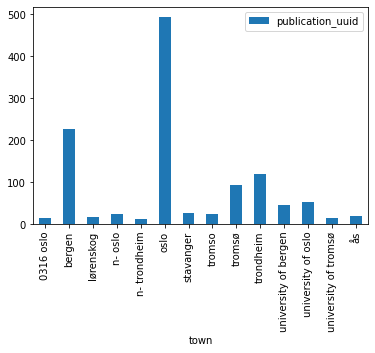

In [64]:
import numpy as np
town_publication_count = df.groupby('town')
town_publication_count = town_publication_count.filter(lambda x: x['publication_uuid'].count() > 10)
town_publication_count = town_publication_count.groupby('town').count()
town_publication_count



town_publication_count.plot.bar(y='publication_uuid')